### Import packages

In [1]:
# Scientific computing
import numpy as np

# Visualisation
import matplotlib.pyplot as plt

# Import the storage tank Class
from cryoevap.storage_tanks import Tank

# Import Cryogen class
from cryoevap.cryogens import Cryogen

### Define all Variables

In [3]:
# Cylindrical storage tank properties
Q_roof = 0 # Roof heat ingress / W
T_air = 293.15 # Temperature of the environment K

# Set overall heat transfer coefficient through the walls for liquid and vapour
U_L = 26e-3 # W/m2/K
U_V = 26e-3 # W/m2/K

# Specify wall heat partitioning fraction
eta_w= 0.7

# Specify tank operating pressure
P = 101325 # Pa

### Variables of interest

# Vertically orientated cylindrical tank volume
V_tank = 0.007 #m^3 | values of 80, 60000 and 165000

# Initial liquid filling / Dimensionless
LF = 0.95 # values of 0.95, 0.80 and 0.30

# Specify heat transfer flux at the bottom
# This will represent the heat conduction from the piping system

q_b = 0 # W/m^2 13.09, 1.99, 0

# especify compound in the tank
Compound = "nitrogen" # hydrogen, methane, ammonia, nitrogen


In [4]:
# Define evaporation time to simulate
hours = 24
evap_time = 3600 * hours

# Thickness of the in % of the internal diameter
ST = 1.02

# Show sim duration
print(f"Simulation time: {hours} h")

Simulation time: 24 h


In [8]:
from scipy.optimize import Bounds, minimize

# Minimum and maximum practical ranges
# of the aspect ratio
bounds = Bounds([0.1], [10])

# Define objective function
def BOR_function(a):
    # Update aspect ratio
    # Calculate internal diameter
    d_i = ((4 * V_tank)/(np.pi * a))**(1/3) # internal diameter / m
    d_o = d_i * ST # external diameter / m
    
    # Initialize tank
    mid_tank = Tank(d_i, d_o, V_tank, LF)

    Q_b=q_b*mid_tank.A_T
    
    mid_tank.set_HeatTransProps(U_L, U_V, T_air, Q_b, Q_roof, eta_w)

    mid_tank.U_roof = U_V
    
    # Set cryogen
    mid_tank.cryogen = Cryogen(name = Compound)
    
    mid_tank.cryogen.set_coolprops(P)
    
    # Define vertical spacing
    dz = 0.003

    # Calculate number of nodes
    
    n_z = 1 + int(np.round(mid_tank.l_V/dz, 0))

    # Define dimensionless computational grid
    mid_tank.z_grid = np.linspace(0, 1, n_z)
    print(len(mid_tank.z_grid))
    # Execute simulation
    mid_tank.evaporate(evap_time)
    
    # Calculate BOR
    BOR = 1 - mid_tank.data['V_L'][-1] / mid_tank.data['V_L'][0]

    print("a = %.3f, BOR=%.3e" % (a, BOR))
    
    return BOR

# Initial liquid filling to optimise

x0 = 1 
res = minimize(BOR_function, x0, method='trust-constr', options={'verbose': 1}, bounds=bounds)

if res.success:
   print(f"\nOptimum found for Tank Volume: {V_tank}, Liquid Filling: {LF*100}%, Compound: {Compound}" + f"\nAspect Ratio = {res.x[0]:.3f}" + f"\nBOR = {res.fun*100:.3f} %")

/tmp/ipykernel_1036/2365697615.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  n_z = 1 + int(np.round(mid_tank.l_V/dz, 0))


4


/tmp/ipykernel_1036/2365697615.py:44: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("a = %.3f, BOR=%.3e" % (a, BOR))


a = 1.000, BOR=3.837e-01
4
a = 1.000, BOR=3.837e-01
5
a = 1.349, BOR=3.078e-01
5
a = 1.349, BOR=3.078e-01
6
a = 1.965, BOR=2.327e-01
6
a = 1.965, BOR=2.327e-01
8
a = 2.673, BOR=1.845e-01
8
a = 2.673, BOR=1.845e-01
9
a = 3.748, BOR=1.439e-01
9
a = 3.748, BOR=1.439e-01
11
a = 4.896, BOR=1.229e-01
11
a = 4.896, BOR=1.229e-01
12
a = 5.575, BOR=1.182e-01
12
a = 5.575, BOR=1.182e-01
12
a = 6.002, BOR=1.171e-01
12
a = 6.002, BOR=1.171e-01
13
a = 6.210, BOR=1.168e-01
13
a = 6.210, BOR=1.168e-01
13
a = 6.260, BOR=1.168e-01
13
a = 6.260, BOR=1.168e-01
13
a = 6.270, BOR=1.168e-01
13
a = 6.270, BOR=1.168e-01
13
a = 6.271, BOR=1.168e-01
13
a = 6.271, BOR=1.168e-01
13
a = 6.271, BOR=1.168e-01
13
a = 6.271, BOR=1.168e-01
13
a = 6.271, BOR=1.168e-01
13
a = 6.271, BOR=1.168e-01
13
a = 6.271, BOR=1.168e-01
13
a = 6.271, BOR=1.168e-01
13
a = 6.271, BOR=1.168e-01
13


KeyboardInterrupt: 

In [6]:
#Boil-off ratio list for plotting
BOR_plot = []

# Generate aspect ratio range
AR = np.linspace(1.3,1.7,30)
# Generate tanks in Aspect Ratio range
for a in AR:
    # Update aspect ratio
    # Calculate internal diameter
    d_i = ((4 * V_tank)/(np.pi * a))**(1/3) # internal diameter / m
    d_o = d_i * ST # external diameter / m
    
    # Initialize tank
    mid_tank = Tank(d_i, d_o, V_tank, LF)

    Q_b=q_b * mid_tank.A_T
    
    mid_tank.set_HeatTransProps(U_L, U_V, T_air, Q_b, Q_roof, eta_w)

    mid_tank.U_roof = U_V
    
    # Set cryogen
    mid_tank.cryogen = Cryogen(name = Compound)
    
    mid_tank.cryogen.set_coolprops(P)
    
    # Define vertical spacing
    dz = 0.1

    # Calculate number of nodes
    n_z = 1 + int(np.round(mid_tank.l_V/dz, 0))

    # Define dimensionless computational grid
    mid_tank.z_grid = np.linspace(0, 1, n_z)
    print(len(mid_tank.z_grid))
    # Execute simulation
    mid_tank.evaporate(evap_time)
    
    # Calculate BOR
    BOR = 1 - mid_tank.data['V_L'][-1] / mid_tank.data['V_L'][0]
    
    # Save BOR value
    BOR_plot.append(BOR*100)
    
    print("a = %.3f, BOR=%.3e" % (a, BOR))
    # print("BOR = %.3f %% | B_l = %.3f " % (BOR * 100, mid_tank.b_l_dot))
    # print(f"Aspect Ratio:{a:.3f}, Altura: {mid_tank.l:.3f} , Diametro interno:{mid_tank.d_i:.3f}, Volumen:{mid_tank.V} \n")
print("Simulation end")

497
a = 1.300, BOR=4.597e-03
500
a = 1.314, BOR=4.595e-03
504
a = 1.328, BOR=4.594e-03
507
a = 1.341, BOR=4.593e-03
511
a = 1.355, BOR=4.592e-03
514
a = 1.369, BOR=4.591e-03
517
a = 1.383, BOR=4.590e-03
521
a = 1.397, BOR=4.589e-03
524
a = 1.410, BOR=4.589e-03
528
a = 1.424, BOR=4.588e-03
531
a = 1.438, BOR=4.588e-03
535
a = 1.452, BOR=4.587e-03
538
a = 1.466, BOR=4.587e-03
541
a = 1.479, BOR=4.587e-03
545
a = 1.493, BOR=4.587e-03
548
a = 1.507, BOR=4.587e-03
551
a = 1.521, BOR=4.587e-03
555
a = 1.534, BOR=4.587e-03
558
a = 1.548, BOR=4.588e-03
561
a = 1.562, BOR=4.588e-03
565
a = 1.576, BOR=4.589e-03
568
a = 1.590, BOR=4.589e-03
571
a = 1.603, BOR=4.590e-03
574
a = 1.617, BOR=4.590e-03
578
a = 1.631, BOR=4.591e-03
581
a = 1.645, BOR=4.592e-03
584
a = 1.659, BOR=4.593e-03
587
a = 1.672, BOR=4.594e-03
591
a = 1.686, BOR=4.595e-03
594
a = 1.700, BOR=4.596e-03
Simulation end


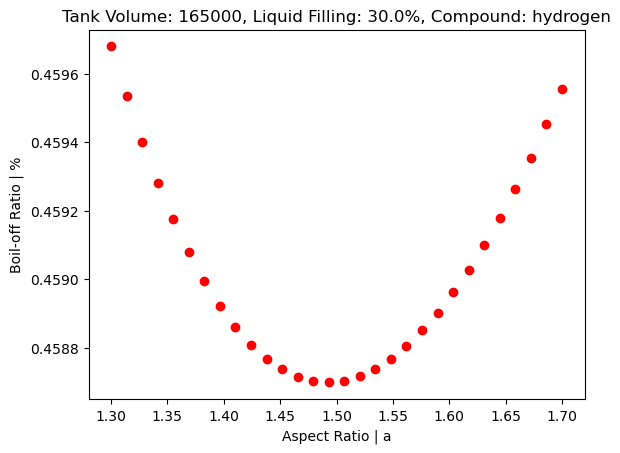

In [9]:
# Create a plot
plt.plot(AR, BOR_plot,"ro")

# Add labels and title
plt.xlabel('Aspect Ratio | a')
plt.ylabel('Boil-off Ratio | %')
plt.title(f'Tank Volume: {V_tank}, Liquid Filling: {LF*100}%, Compound: {Compound}')


# Save the plot
plt.savefig(f'{Compound}/V_{V_tank}_LF_{LF*100}_C_{Compound}_evap.png')

# Display the plot
plt.show()